import modules

In [3]:
import rasterio
import numpy as np
from rasterio.windows import Window
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

import random
import matplotlib.colors as mc
import cmocean


open 60m band files and read files 


In [4]:
band1_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B01_60m.jp2').read().astype('float32')
band2_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B02_60m.jp2').read().astype('float32')
band3_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B03_60m.jp2').read().astype('float32')
band4_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B04_60m.jp2').read().astype('float32')
band8_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B8A_60m.jp2').read().astype('float32')
band11_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B11_60m.jp2').read().astype('float32')
band12_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B12_60m.jp2').read().astype('float32')

flatten files 

In [5]:
blue_flat = band2_60.flatten()
green_flat = band3_60.flatten()
red_flat = band4_60.flatten()
NIR = band8_60.flatten()
print(NIR)
coastal_flat = band1_60.flatten()
swir1_flat = band11_60.flatten()
swir2_flat = band12_60.flatten()

[  75.   81.   75. ... 2397. 2232. 2429.]


stack files for visualisation

In [5]:
stacked2 = np.vstack((blue_flat, green_flat)).T
stacked3 = np.vstack((red_flat, green_flat, blue_flat)).T
stacked_vegetation = np.vstack((NIR, red_flat, green_flat)).T
stacked_bathymetric = np.vstack((red_flat, green_flat, coastal_flat)).T
stacked_agriculture = np.vstack((swir1_flat, NIR, blue_flat)).T

In [6]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

[0.0047081  0.00508475 0.0047081  ... 0.15047081 0.140113   0.1524796 ]


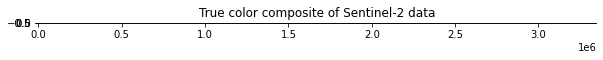

In [7]:
blue_plot = np.array(band2_60[0])
green_plot = np.array(band3_60[0])
red_plot = np.array(band4_60[0])
nir_plot = np.array(band8_60[0])
bluen = normalize(blue_plot).flatten()
greenn = normalize(green_plot).flatten()
redn = normalize(red_plot).flatten()
nirn = normalize(nir_plot).flatten()
print(nirn)
rgb = np.dstack((redn, greenn, bluen))
plt.figure(figsize=(10,10))
plt.title('True color composite of Sentinel-2 data')
plt.imshow(rgb)

In [8]:
stacked3_norm = np.vstack((redn, greenn, bluen)).T

create random state for clustering

In [9]:
random = random.randint(1,3000000)

KMeans clustering 

In [9]:
clustering4 = KMeans(n_clusters=4, random_state=random)
cluster2 = clustering4.fit_predict(stacked3)
cluster3 = clustering4.fit_predict(stacked_vegetation)


In [10]:
clustering6 = KMeans(n_clusters=6, random_state = random)
cluster4 = clustering6.fit_predict(stacked_bathymetric)
cluster5 = clustering6.fit_predict(stacked_agriculture)

In [37]:
clustering2 = KMeans(n_clusters=2, random_state = random)
cluster6 = clustering2.fit_predict(stacked_vegetation)
cluster7 = clustering2.fit_predict(stacked_agriculture)


DBScan clustering

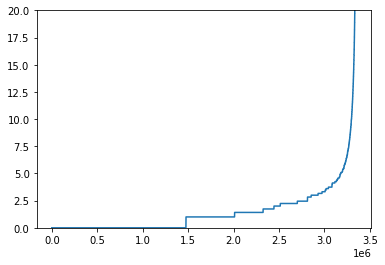

In [67]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(stacked3)
distances, indices = nbrs.kneighbors(stacked3)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
#axes.set_ylim([0,500])
plt.ylim(0,20)
plt.plot(distances)

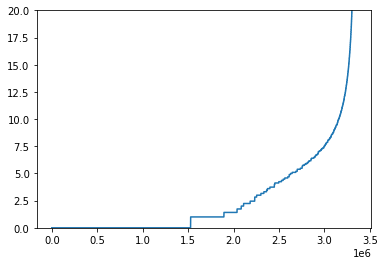

In [72]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(stacked_vegetation)
distances, indices = nbrs.kneighbors(stacked_vegetation)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
#axes.set_ylim([0,500])
plt.ylim(0,20)
plt.plot(distances)

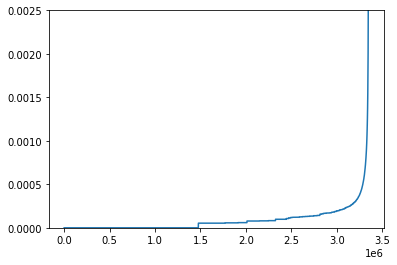

In [109]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(stacked3_norm)
distances, indices = nbrs.kneighbors(stacked3_norm)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
#axes.set_ylim([0,500])
plt.ylim(0,0.0025)
plt.plot(distances)

In [68]:
dbscan = DBSCAN(eps=4, min_samples = 5)
cluster2_dbscan = dbscan.fit_predict(stacked3)


In [110]:
dbscan3 = DBSCAN(eps=0.0003, min_samples = 4)
cluster3_dbscan_norm = dbscan3.fit_predict(stacked3_norm)

check shape of clusters 

In [111]:
print('shape cluster 2', cluster2.shape)
print('shape cluster 3', cluster3.shape)
print('shape cluster 4', cluster4.shape)
print('shape cluster 5', cluster5.shape)
print(cluster3_dbscan_norm.shape)

shape cluster 2 (3348900,)
shape cluster 3 (3348900,)
shape cluster 4 (3348900,)
shape cluster 5 (3348900,)
(3348900,)


In [7]:
plot_array_3 = np.reshape(cluster2, (len(band2_60[0]), len(band2_60[0])))
plot_array_4 = np.reshape(cluster3, (len(band2_60[0]), len(band2_60[0])))

plot_array_5 = np.reshape(cluster4, (len(band2_60[0]), len(band2_60[0])))
plot_array_6 = np.reshape(cluster5, (len(band2_60[0]), len(band2_60[0])))

plot_array_7 = np.reshape(cluster6, (len(band2_60[0]), len(band2_60[0])))
plot_array_8 = np.reshape(cluster7, (len(band2_60[0]), len(band2_60[0])))


NameError: name 'cluster2' is not defined

In [112]:
plot_array_3_dbscan = np.reshape(cluster2_dbscan, (len(band2_60[0]), len(band2_60[0])))
plot_array_4_dbscan = np.reshape(cluster3_dbscan, (len(band2_60[0]), len(band2_60[0])))
plot_array_3_dbscan_norm = np.reshape(cluster3_dbscan_norm, (len(band2_60[0]), len(band2_60[0])))


NameError: name 'plot_array_3' is not defined

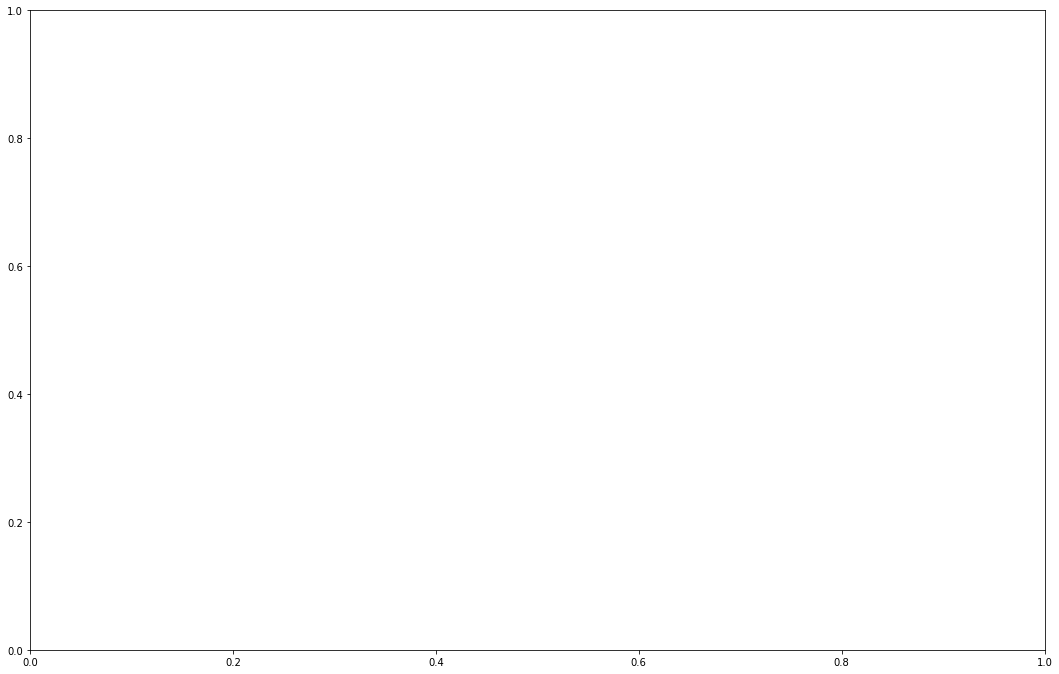

In [6]:
fig = plt.figure(figsize =(40,40))

ax1 = fig.add_subplot(321)
ax1.imshow(plot_array_3, cmap='cmo.topo')
ax1.set_title("Image classification of Red/Green/Blue bands using 4 clusters ",fontsize=24)

ax2 = fig.add_subplot(322)
ax2.imshow(plot_array_4, cmap='cmo.thermal')
ax2.set_title("Image classification of NIR/Red/Green bands using 4 clusters ",fontsize=24)

ax3 = fig.add_subplot(323)
ax3.imshow(plot_array_5, cmap='cmo.delta')
ax3.set_title("Image classification of Red/Green/Coastal bands using 6 clusters ",fontsize=24)

ax4 = fig.add_subplot(324)
ax4.imshow(plot_array_6, cmap='gist_earth')
ax4.set_title("Image classification of SWIR/NIR/Blue bands using 6 clusters ",fontsize=24)

ax5 = fig.add_subplot(325)
ax5.imshow(plot_array_7, cmap='cmo.rain')
ax5.set_title("Image classification of Red/Green/Blue bands using 2 clusters ",fontsize=24)

ax6 = fig.add_subplot(326)
ax6.imshow(plot_array_8, cmap='cmo.thermal')
ax6.set_title("Image classification of NIR/Red/Green bands using 2 clusters ",fontsize=24)


plt.tight_layout()

In [1]:
fig = plt.figure(figsize =(40,40))

ax1 = fig.add_subplot(121)
ax1.imshow(plot_array_3_dbscan, cmap='cmo.balance')
ax1.set_title("Image classification of Blue/Red/Green bands using DBScan ",fontsize=24)
ax2 = fig.add_subplot(122)
ax2.imshow(plot_array_3_dbscan_norm, cmap='cmo.balance')
ax2.set_title("Image classification of Blue/Red/Green (normed) bands using DBScan ",fontsize=24)

plt.tight_layout()

NameError: name 'plt' is not defined

In [15]:
# figuur makes no sense

#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.scatter(reshaped_60m[0], reshaped_60m[1])
#plt.show()

plot clusters in 3D 

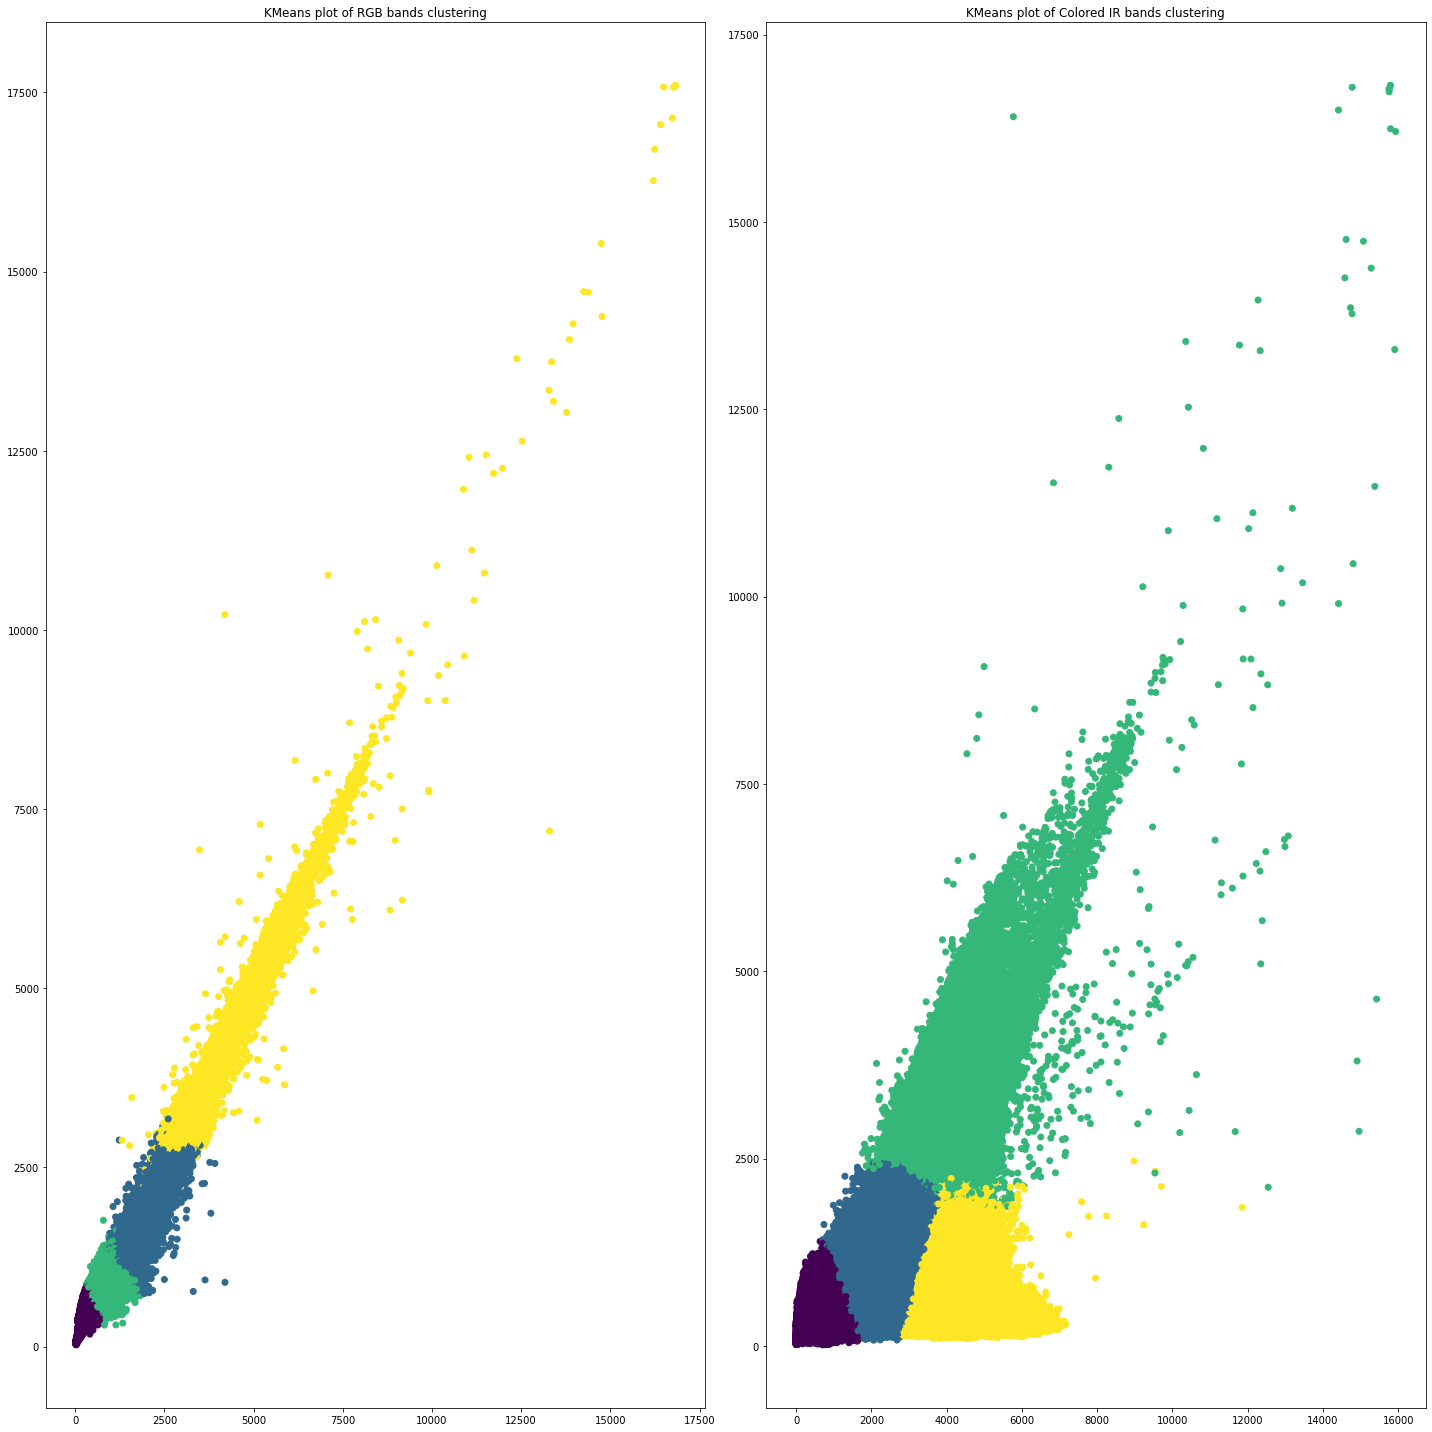

In [35]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.scatter(stacked3[:,0], stacked3[:,1],c=cluster2)
ax1.set_title('KMeans plot of RGB bands clustering')
ax2 = fig.add_subplot(122)
ax2.scatter(stacked_vegetation[:,0], stacked_vegetation[:,1],c=cluster3)
ax2.set_title('KMeans plot of Colored IR bands clustering')
plt.tight_layout()
plt.show()

open 10m band files

In [17]:
with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B02_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band2_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B03_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band3_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B04_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band4_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B08_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band8_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

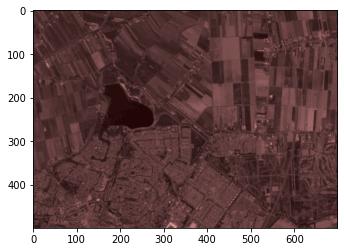

In [18]:
plt.imshow(band8_10, cmap = 'pink')
plt.imshow(band2_10, cmap = 'pink')
plt.imshow(band3_10, cmap = 'pink')
plt.imshow(band4_10, cmap = 'pink')
plt.show()